In [53]:
import torch
import os
import cv2
from yolo.utils.utils import *
from predictors.YOLOv3 import YOLOv3Predictor
import glob
from tqdm import tqdm
import sys
%matplotlib inline
from matplotlib import pyplot as plt

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()

In [41]:
yolo_modanet_params = {"model_def" : "yolo/modanetcfg/yolov3-modanet.cfg",
"weights_path" : "yolo/weights/yolov3-modanet_last.weights",
"class_path":"yolo/modanetcfg/modanet.names",
"conf_thres" : 0.5,
"nms_thres" :0.4,
"img_size" : 416,
"device" : device}

In [42]:
yolo_params = yolo_modanet_params

In [43]:
classes = load_classes(yolo_params["class_path"])

In [44]:
cmap = plt.get_cmap("rainbow")
colors = np.array([cmap(i) for i in np.linspace(0, 1, 13)])

In [45]:
detectron = YOLOv3Predictor(params=yolo_params)

Model loaded successfully from yolo/weights/yolov3-modanet_last.weights.


In [161]:
# while(True):
#     path = input('img path: ')
#     if not os.path.exists(path):
#         print('Img does not exists..')
#         continue
path = './new_web_images/model_3.png'
img = cv2.imread(path)
detections = detectron.get_detections(img)

In [162]:
if len(detections) != 0 :
    detections.sort(reverse=False ,key = lambda x:x[4])
    for x1, y1, x2, y2, cls_conf, cls_pred in detections:

            #feat_vec =detectron.compute_features_from_bbox(img,[(x1, y1, x2, y2)])
            #feat_vec = detectron.extract_encoding_features(img)
            #print(feat_vec)
            #print(a.get_field('features')[0].shape)
            print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf))           


            #color = bbox_colors[np.where(unique_labels == cls_pred)[0]][0]
            color = colors[int(cls_pred)]

            color = tuple(c*255 for c in color)
            color = (.7*color[2],.7*color[1],.7*color[0])       

            font = cv2.FONT_HERSHEY_SIMPLEX   


            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            text =  "%s conf: %.3f" % (classes[int(cls_pred)] ,cls_conf)

            cv2.rectangle(img,(x1,y1) , (x2,y2) , color,3)
            y1 = 0 if y1<0 else y1
            y1_rect = y1-25
            y1_text = y1-5

            if y1_rect<0:
                y1_rect = y1+27
                y1_text = y1+20
            cv2.rectangle(img,(x1-2,y1_rect) , (x1 + int(8.5*len(text)),y1) , color,-1)
            cv2.putText(img,text,(x1,y1_text), font, 0.5,(255,255,255),1,cv2.LINE_AA)

	+ Label: top, Conf: 0.52070
	+ Label: skirt, Conf: 0.56505
	+ Label: footwear, Conf: 0.82151
	+ Label: footwear, Conf: 0.89884
	+ Label: outer, Conf: 0.90193
	+ Label: bag, Conf: 0.91735
	+ Label: headwear, Conf: 0.98760


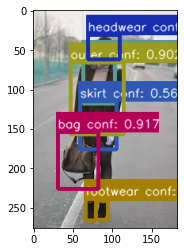

True

In [163]:
plt.imshow(img)
plt.show()
img_id = path.split('/')[-1].split('.')[0]
cv2.imwrite('output/ouput-test_{}_{}_{}.jpg'.format(img_id,'yolo','modanet'),img)

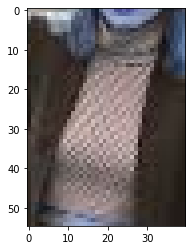

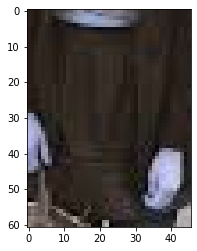

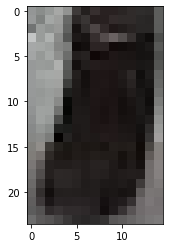

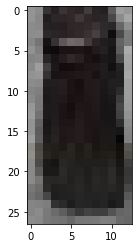

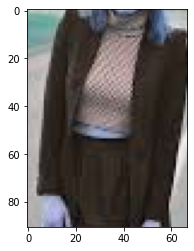

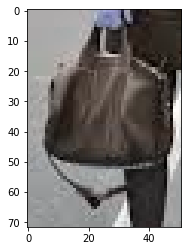

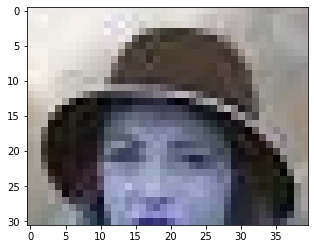

In [164]:
img2 = cv2.imread(path)

if len(detections) != 0 :
    detections.sort(reverse=False ,key = lambda x:x[4])
    for x1, y1, x2, y2, cls_conf, cls_pred in detections:
        img_name = path.split('/')[-1].split('.')[0]
        dir_path = './finaldata/'+img_name
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cls_conf = round(cls_conf,2)
        if os.path.exists(dir_path):
            cropped_image = img2[y1:y2, x1:x2]
            cv2.imwrite(dir_path+'/output-{}_{}_{}.jpg'.format(img_name,classes[int(cls_pred)],str(cls_conf)),cropped_image)
        else:
            os.mkdir(dir_path)
            cropped_image = img2[y1:y2, x1:x2]
            cv2.imwrite(dir_path+'/output-{}_{}_{}.jpg'.format(img_name,classes[int(cls_pred)],str(cls_conf)),cropped_image)
            
        plt.imshow(cropped_image)
        plt.show()